<a href="https://colab.research.google.com/github/Swap1984/swapnil/blob/main/Assignment_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TF-IDF method of Embedding


While BoW focuses purely on counting the frequency of terms, TF-IDF adjusts these counts by considering how common or rare a word is across a corpus (set of documents). This helps in down-weighting common words (like "the", "is") and emphasizing important words that are specific to a document.

**Key Concepts**

TF-IDF (Term Frequency-Inverse Document Frequency):

Purpose: Measures how important a word is in a document relative to the entire corpus.

Effect: It down-weights common words (that appear in many documents) and emphasizes words that are unique to specific documents.

Output: Each document is represented as a vector of TF-IDF scores.

**Advantages of TF-IDF and Cosine Similarity:**

Robust to Document Length:

Since cosine similarity is based on the angle between vectors, it ignores document length, making it robust for comparing documents of different sizes.
Considers Importance of Terms:

TF-IDF accounts for the relative importance of terms in a document and across documents. Common words (like stop words) are down-weighted, while rare, informative words have higher impact.
Efficient for Sparse Data:

Text data is often sparse, meaning that documents share relatively few words. TF-IDF with cosine similarity efficiently handles this sparsity.
Interpretability:

TF-IDF scores are easy to interpret: they represent the importance of each word in the document relative to the corpus, while cosine similarity is straightforward in showing how similar documents are.

**Disadvantages of TF-IDF and Cosine Similarity:**

Does Not Consider Word Order:

Both TF-IDF and cosine similarity ignore the sequence of words (context). This means two documents that share the same words but in different orders could still be considered similar.
No Semantic Understanding:

TF-IDF treats words as independent tokens, meaning it cannot capture synonyms or other semantic relationships between words. For example, "car" and "automobile" would be treated as different terms.
Limited for Short Texts:

When working with very short documents (like tweets or single sentences), the lack of context may lead to lower quality results, since TF-IDF relies on term frequency.


### **Comparison: TF-IDF vs. Bag of Words (BoW)**

| **Feature**                 | **TF-IDF**                                                   | **Bag of Words (BoW)**                                     |
|-----------------------------|---------------------------------------------------------------|------------------------------------------------------------|
| **Word Importance**          | Considers the relative importance of words across the corpus | Treats all words with equal importance                      |
| **Document Representation**  | Each document is a weighted vector of word importance         | Each document is represented as a simple word count vector  |
| **Common Terms**             | Down-weights frequent, less informative words                | Common words are weighted equally with unique words         |
| **Semantic Understanding**   | Does not capture word meaning, but considers frequency        | Treats words as independent tokens without semantic context |
| **Document Length**          | Insensitive to length (cosine similarity)                    | May give more weight to longer documents                    |
| **Best Use Case**            | Best for long documents or collections of documents           | Better for simpler tasks with smaller datasets              |


# TF-IDF Code

Initialising Libraries for preprocessing the data for emmbedding

In [ ]:
import string #This module is used to remove punctuation from the text.
import re #This regular expressions module is useful for operations like replacing repeated characters.
from nltk.corpus import stopwords #  Provides a list of common English stopwords (e.g., "the", "is") that are generally not informative in text analysis.
from nltk.tokenize import word_tokenize # to Tokenize a string into individual words.
from nltk.stem import WordNetLemmatizer # to Convert words to their base (dictionary) form using lemmatization.
from sklearn.feature_extraction.text import TfidfVectorizer # to Convert a collection of raw documents to a matrix of TF-IDF features.

In [ ]:
# using a paragraph as input . data =""   ""
data = """Yes, life is full, there is life even underground,” he began again. “You wouldn’t believe, Alexey, how I want to live now, what a thirst for existence and consciousness has sprung up in me within these peeling walls… And what is suffering? I am not afraid of it, even if it were beyond reckoning. I am not afraid of it now. I was afraid of it before… And I seem to have such strength in me now, that I think I could stand anything, any suffering, only to be able to say and to repeat to myself every moment, ‘I exist.’ In thousands of agonies — I exist. I’m tormented on the rack — but I exist! Though I sit alone on a pillar — I exist! I see the sun, and if I don’t see the sun, I know it’s there. And there’s a whole life in that, in knowing that the sun is there."""

In [ ]:
# Lowercasing
data = data.lower()
data

'yes, life is full, there is life even underground,” he began again. “you wouldn’t believe, alexey, how i want to live now, what a thirst for existence and consciousness has sprung up in me within these peeling walls… and what is suffering? i am not afraid of it, even if it were beyond reckoning. i am not afraid of it now. i was afraid of it before… and i seem to have such strength in me now, that i think i could stand anything, any suffering, only to be able to say and to repeat to myself every moment, ‘i exist.’ in thousands of agonies — i exist. i’m tormented on the rack — but i exist! though i sit alone on a pillar — i exist! i see the sun, and if i don’t see the sun, i know it’s there. and there’s a whole life in that, in knowing that the sun is there.'

In [ ]:
# Removing ellipses and punctuation, including straight and curly quotation marks
data = re.sub(r'\.{2,}', '', data)  # Remove ellipses (two or more dots)
data = re.sub(r'…', ' ', data)  # Replace Unicode ellipses with a space
data = re.sub(r'\s+', ' ', data)  # Replace multiple spaces with a single space
data = re.sub(r'\.\.\.+', '', data)  # Remove ellipses
punctuation = string.punctuation + "“”‘’—"  # Include curly quotes and em dash
data= data.translate(str.maketrans("", "", punctuation))# Removing punctuation
data


'yes life is full there is life even underground he began again you wouldnt believe alexey how i want to live now what a thirst for existence and consciousness has sprung up in me within these peeling walls and what is suffering i am not afraid of it even if it were beyond reckoning i am not afraid of it now i was afraid of it before and i seem to have such strength in me now that i think i could stand anything any suffering only to be able to say and to repeat to myself every moment i exist in thousands of agonies  i exist im tormented on the rack  but i exist though i sit alone on a pillar  i exist i see the sun and if i dont see the sun i know its there and theres a whole life in that in knowing that the sun is there'

I was getting the ellipses even after including the ellipsees removing code so I used the unicode ellipses removal method by converting them into spaces and then the space removing method to get rid of the entire punctuation and formatting of the data.
As seen above all the punctuation marks were to be removed but we see that the curly quotation marks and hyphen and dots are still there so adding the same to the string libraray and processing the data.
Thus we see that all punctuation marks have been removed

In [ ]:
import nltk
nltk.download('stopwords')  # Download the stopwords resource

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Removing stopwords
stop_words = set(stopwords.words("english"))
data = " ".join([word for word in data.split() if word not in stop_words])
data

'yes life full life even underground began wouldnt believe alexey want live thirst existence consciousness sprung within peeling walls suffering afraid even beyond reckoning afraid afraid seem strength think could stand anything suffering able say repeat every moment exist thousands agonies exist im tormented rack exist though sit alone pillar exist see sun dont see sun know theres whole life knowing sun'

In [ ]:
import nltk
nltk.download('punkt') # required as an weerror occured during tokenisation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Lemmatization to convert the worts to their root form
import nltk
nltk.download('wordnet') #required as the error occured during lemmatization
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(token) for token in tokens]
tokens

[nltk_data] Downloading package wordnet to /root/nltk_data...


['yes',
 'life',
 'full',
 'life',
 'even',
 'underground',
 'began',
 'wouldnt',
 'believe',
 'alexey',
 'want',
 'live',
 'thirst',
 'existence',
 'consciousness',
 'sprung',
 'within',
 'peeling',
 'wall',
 'suffering',
 'afraid',
 'even',
 'beyond',
 'reckoning',
 'afraid',
 'afraid',
 'seem',
 'strength',
 'think',
 'could',
 'stand',
 'anything',
 'suffering',
 'able',
 'say',
 'repeat',
 'every',
 'moment',
 'exist',
 'thousand',
 'agony',
 'exist',
 'im',
 'tormented',
 'rack',
 'exist',
 'though',
 'sit',
 'alone',
 'pillar',
 'exist',
 'see',
 'sun',
 'dont',
 'see',
 'sun',
 'know',
 'there',
 'whole',
 'life',
 'knowing',
 'sun']

We see that the lemmatized output still contains the words with suffixes. We will have to perform Parts of speech (POS) tagging for this . thus we will perform following actions

In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#Function to get the WordNet POS tag for lemmatization
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
tokens = word_tokenize(data)
pos_tags = pos_tag(tokens)
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(pos)) for token, pos in pos_tags]
lemmatized_tokens

['yes',
 'life',
 'full',
 'life',
 'even',
 'underground',
 'begin',
 'wouldnt',
 'believe',
 'alexey',
 'want',
 'live',
 'thirst',
 'existence',
 'consciousness',
 'sprung',
 'within',
 'peel',
 'wall',
 'suffer',
 'afraid',
 'even',
 'beyond',
 'reckon',
 'afraid',
 'afraid',
 'seem',
 'strength',
 'think',
 'could',
 'stand',
 'anything',
 'suffer',
 'able',
 'say',
 'repeat',
 'every',
 'moment',
 'exist',
 'thousand',
 'agony',
 'exist',
 'im',
 'torment',
 'rack',
 'exist',
 'though',
 'sit',
 'alone',
 'pillar',
 'exist',
 'see',
 'sun',
 'dont',
 'see',
 'sun',
 'know',
 'theres',
 'whole',
 'life',
 'know',
 'sun']

As seen there are repeated word in the corpus now.. we will keep only the unique words

In [ ]:
#Remove duplicates while preserving order
unique_tokens = list(dict.fromkeys(lemmatized_tokens))
unique_tokens

['yes',
 'life',
 'full',
 'even',
 'underground',
 'begin',
 'wouldnt',
 'believe',
 'alexey',
 'want',
 'live',
 'thirst',
 'existence',
 'consciousness',
 'sprung',
 'within',
 'peel',
 'wall',
 'suffer',
 'afraid',
 'beyond',
 'reckon',
 'seem',
 'strength',
 'think',
 'could',
 'stand',
 'anything',
 'able',
 'say',
 'repeat',
 'every',
 'moment',
 'exist',
 'thousand',
 'agony',
 'im',
 'torment',
 'rack',
 'though',
 'sit',
 'alone',
 'pillar',
 'see',
 'sun',
 'dont',
 'know',
 'theres',
 'whole']

In [ ]:
# Removing digits
final_tokens = [token for token in unique_tokens if token.isalpha()]
final_tokens

['yes',
 'life',
 'full',
 'even',
 'underground',
 'begin',
 'wouldnt',
 'believe',
 'alexey',
 'want',
 'live',
 'thirst',
 'existence',
 'consciousness',
 'sprung',
 'within',
 'peel',
 'wall',
 'suffer',
 'afraid',
 'beyond',
 'reckon',
 'seem',
 'strength',
 'think',
 'could',
 'stand',
 'anything',
 'able',
 'say',
 'repeat',
 'every',
 'moment',
 'exist',
 'thousand',
 'agony',
 'im',
 'torment',
 'rack',
 'though',
 'sit',
 'alone',
 'pillar',
 'see',
 'sun',
 'dont',
 'know',
 'theres',
 'whole']

In [ ]:
# Handelling rare words which may not add much value thus can be removed

from collections import Counter
word_freq = Counter(final_tokens)
final_tokens1 = [token for token in tokens if word_freq[token] > 1]
final_tokens1

[]

In [ ]:
#This will create unigrams and bigrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2))
vectorizer.fit(final_tokens)
unigrams_bigrams = vectorizer.get_feature_names_out()
unigrams_bigrams

array(['able', 'afraid', 'agony', 'alexey', 'alone', 'anything', 'begin',
       'believe', 'beyond', 'consciousness', 'could', 'dont', 'even',
       'every', 'exist', 'existence', 'full', 'im', 'know', 'life',
       'live', 'moment', 'peel', 'pillar', 'rack', 'reckon', 'repeat',
       'say', 'see', 'seem', 'sit', 'sprung', 'stand', 'strength',
       'suffer', 'sun', 'theres', 'think', 'thirst', 'though', 'thousand',
       'torment', 'underground', 'wall', 'want', 'whole', 'within',
       'wouldnt', 'yes'], dtype=object)

As seen in our corpus each word is unique and thus rare so our final token output is empty list.so moving ahead with the final tokens list for embedding.

In [ ]:
final_tokens

['yes',
 'life',
 'full',
 'even',
 'underground',
 'begin',
 'wouldnt',
 'believe',
 'alexey',
 'want',
 'live',
 'thirst',
 'existence',
 'consciousness',
 'sprung',
 'within',
 'peel',
 'wall',
 'suffer',
 'afraid',
 'beyond',
 'reckon',
 'seem',
 'strength',
 'think',
 'could',
 'stand',
 'anything',
 'able',
 'say',
 'repeat',
 'every',
 'moment',
 'exist',
 'thousand',
 'agony',
 'im',
 'torment',
 'rack',
 'though',
 'sit',
 'alone',
 'pillar',
 'see',
 'sun',
 'dont',
 'know',
 'theres',
 'whole']

In [ ]:
#Join the tokens into a single string (since TF-IDF expects text data, not tokenized words)
text_data = " ".join(final_tokens)
text_data

'yes life full even underground begin wouldnt believe alexey want live thirst existence consciousness sprung within peel wall suffer afraid beyond reckon seem strength think could stand anything able say repeat every moment exist thousand agony im torment rack though sit alone pillar see sun dont know theres whole'

In [ ]:
#TF-IDF matrix
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
#Create the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Using both unigrams and bigrams

In [ ]:
#Fit and transform the text data into TF-IDF representation
tfidf_matrix = tfidf_vectorizer.fit_transform([text_data])

In [ ]:
#Get the feature names (unigrams and bigrams)
unigrams_bigrams_tfidf = tfidf_vectorizer.get_feature_names_out()
unigrams_bigrams_tfidf

array(['able', 'able say', 'afraid', 'afraid beyond', 'agony', 'agony im',
       'alexey', 'alexey want', 'alone', 'alone pillar', 'anything',
       'anything able', 'begin', 'begin wouldnt', 'believe',
       'believe alexey', 'beyond', 'beyond reckon', 'consciousness',
       'consciousness sprung', 'could', 'could stand', 'dont',
       'dont know', 'even', 'even underground', 'every', 'every moment',
       'exist', 'exist thousand', 'existence', 'existence consciousness',
       'full', 'full even', 'im', 'im torment', 'know', 'know theres',
       'life', 'life full', 'live', 'live thirst', 'moment',
       'moment exist', 'peel', 'peel wall', 'pillar', 'pillar see',
       'rack', 'rack though', 'reckon', 'reckon seem', 'repeat',
       'repeat every', 'say', 'say repeat', 'see', 'see sun', 'seem',
       'seem strength', 'sit', 'sit alone', 'sprung', 'sprung within',
       'stand', 'stand anything', 'strength', 'strength think', 'suffer',
       'suffer afraid', 'sun', 'sun 

In [ ]:
#Convert the TF-IDF matrix to an array to get the TF-IDF scores
tfidf_array = tfidf_matrix.toarray()
tfidf_array


array([[0.10153462, 0.10153462, 0.10153462, 0.10153462, 0.10153462,
        0.10153462, 0.10153462, 0.10153462, 0.10153462, 0.10153462,
        0.10153462, 0.10153462, 0.10153462, 0.10153462, 0.10153462,
        0.10153462, 0.10153462, 0.10153462, 0.10153462, 0.10153462,
        0.10153462, 0.10153462, 0.10153462, 0.10153462, 0.10153462,
        0.10153462, 0.10153462, 0.10153462, 0.10153462, 0.10153462,
        0.10153462, 0.10153462, 0.10153462, 0.10153462, 0.10153462,
        0.10153462, 0.10153462, 0.10153462, 0.10153462, 0.10153462,
        0.10153462, 0.10153462, 0.10153462, 0.10153462, 0.10153462,
        0.10153462, 0.10153462, 0.10153462, 0.10153462, 0.10153462,
        0.10153462, 0.10153462, 0.10153462, 0.10153462, 0.10153462,
        0.10153462, 0.10153462, 0.10153462, 0.10153462, 0.10153462,
        0.10153462, 0.10153462, 0.10153462, 0.10153462, 0.10153462,
        0.10153462, 0.10153462, 0.10153462, 0.10153462, 0.10153462,
        0.10153462, 0.10153462, 0.10153462, 0.10

In [ ]:
#Create a dictionary to map tokens to their TF-IDF scores
tfidf_scores = dict(zip(unigrams_bigrams_tfidf, tfidf_array[0]))
tfidf_scores

{'able': 0.10153461651336192,
 'able say': 0.10153461651336192,
 'afraid': 0.10153461651336192,
 'afraid beyond': 0.10153461651336192,
 'agony': 0.10153461651336192,
 'agony im': 0.10153461651336192,
 'alexey': 0.10153461651336192,
 'alexey want': 0.10153461651336192,
 'alone': 0.10153461651336192,
 'alone pillar': 0.10153461651336192,
 'anything': 0.10153461651336192,
 'anything able': 0.10153461651336192,
 'begin': 0.10153461651336192,
 'begin wouldnt': 0.10153461651336192,
 'believe': 0.10153461651336192,
 'believe alexey': 0.10153461651336192,
 'beyond': 0.10153461651336192,
 'beyond reckon': 0.10153461651336192,
 'consciousness': 0.10153461651336192,
 'consciousness sprung': 0.10153461651336192,
 'could': 0.10153461651336192,
 'could stand': 0.10153461651336192,
 'dont': 0.10153461651336192,
 'dont know': 0.10153461651336192,
 'even': 0.10153461651336192,
 'even underground': 0.10153461651336192,
 'every': 0.10153461651336192,
 'every moment': 0.10153461651336192,
 'exist': 0.1015

In [ ]:
for token, score in tfidf_scores.items():
    print(f"{token}: {score:.4f}")

able: 0.1015
able say: 0.1015
afraid: 0.1015
afraid beyond: 0.1015
agony: 0.1015
agony im: 0.1015
alexey: 0.1015
alexey want: 0.1015
alone: 0.1015
alone pillar: 0.1015
anything: 0.1015
anything able: 0.1015
begin: 0.1015
begin wouldnt: 0.1015
believe: 0.1015
believe alexey: 0.1015
beyond: 0.1015
beyond reckon: 0.1015
consciousness: 0.1015
consciousness sprung: 0.1015
could: 0.1015
could stand: 0.1015
dont: 0.1015
dont know: 0.1015
even: 0.1015
even underground: 0.1015
every: 0.1015
every moment: 0.1015
exist: 0.1015
exist thousand: 0.1015
existence: 0.1015
existence consciousness: 0.1015
full: 0.1015
full even: 0.1015
im: 0.1015
im torment: 0.1015
know: 0.1015
know theres: 0.1015
life: 0.1015
life full: 0.1015
live: 0.1015
live thirst: 0.1015
moment: 0.1015
moment exist: 0.1015
peel: 0.1015
peel wall: 0.1015
pillar: 0.1015
pillar see: 0.1015
rack: 0.1015
rack though: 0.1015
reckon: 0.1015
reckon seem: 0.1015
repeat: 0.1015
repeat every: 0.1015
say: 0.1015
say repeat: 0.1015
see: 0.1015

#Inference

Analysis and interpretation

The inference from this specific output is that all words have been treated equally by the TF-IDF model because I have provided a single document with uniform term frequencies. For more insightful results, applying TF-IDF across multiple documents would be more effective in highlighting which words or phrases are truly important within the  corpus.

# TF-IDF embedding using different documents

In [ ]:
#Consider the following data with each sentence being treated as a separate document
data = ["”Yes, life is full, there is life even underground,” he began again." ,
"“You wouldn’t believe, Alexey, how I want to live now, what a thirst for existence and consciousness has sprung up in me within these peeling walls…",
" And what is suffering? I am not afraid of it, even if it were beyond reckoning.",
" I am not afraid of it now.",
" I was afraid of it before… And I seem to have such strength in me now, that I think I could stand anything, any suffering, only to be able to say and to repeat to myself every moment, ‘I exist.’",
"In thousands of agonies—I exist.",
" I’m tormented on the rack — but I exist! Though I sit alone on a pillar — I exist! I see the sun, and if I don’t see the sun, I know it’s there. And there’s a whole life in that, in knowing that the sun is there."
]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Creating the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')


In [ ]:
# Fitting the TF-IDF model on the corpus and transform it into TF-IDF scores
tfidf_matrix = tfidf_vectorizer.fit_transform(data)
tfidf_matrix

<7x75 sparse matrix of type '<class 'numpy.float64'>'
	with 81 stored elements in Compressed Sparse Row format>

In [ ]:
# Getting the feature names (words/phrases) from the corpus
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_names

array(['able', 'able say', 'afraid', 'afraid reckoning',
       'afraid strength', 'agonies', 'agonies exist', 'alexey',
       'alexey want', 'began', 'believe', 'believe alexey',
       'consciousness', 'consciousness sprung', 'don', 'don sun', 'exist',
       'exist sit', 'exist sun', 'existence', 'existence consciousness',
       'know', 'know life', 'knowing', 'knowing sun', 'life',
       'life knowing', 'life life', 'life underground', 'live',
       'live thirst', 'moment', 'moment exist', 'peeling',
       'peeling walls', 'pillar', 'pillar exist', 'rack', 'rack exist',
       'reckoning', 'repeat', 'repeat moment', 'say', 'say repeat', 'sit',
       'sit pillar', 'sprung', 'sprung peeling', 'stand',
       'stand suffering', 'strength', 'strength think', 'suffering',
       'suffering able', 'suffering afraid', 'sun', 'sun don', 'sun know',
       'think', 'think stand', 'thirst', 'thirst existence', 'thousands',
       'thousands agonies', 'tormented', 'tormented rack', 'und

In [ ]:
# Converting the TF-IDF matrix to a dense array for easier readability
tfidf_array = tfidf_matrix.toarray()
tfidf_array

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.32015502,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.53151232, 0.        , 0.32015502, 0.32015502, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.32015502, 0.32015502, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.32

In [ ]:
# Display the TF-IDF scores for each document
for i, doc_tfidf in enumerate(tfidf_array):
    print(f"\nDocument {i+1} TF-IDF Scores:")
    for word, score in zip(feature_names, doc_tfidf):
        if score > 0:
            print(f"{word}: {score:.4f}")


Document 1 TF-IDF Scores:
began: 0.3202
life: 0.5315
life life: 0.3202
life underground: 0.3202
underground: 0.3202
underground began: 0.3202
yes: 0.3202
yes life: 0.3202

Document 2 TF-IDF Scores:
alexey: 0.2182
alexey want: 0.2182
believe: 0.2182
believe alexey: 0.2182
consciousness: 0.2182
consciousness sprung: 0.2182
existence: 0.2182
existence consciousness: 0.2182
live: 0.2182
live thirst: 0.2182
peeling: 0.2182
peeling walls: 0.2182
sprung: 0.2182
sprung peeling: 0.2182
thirst: 0.2182
thirst existence: 0.2182
walls: 0.2182
want: 0.2182
want live: 0.2182
wouldn: 0.2182
wouldn believe: 0.2182

Document 3 TF-IDF Scores:
afraid: 0.3465
afraid reckoning: 0.4884
reckoning: 0.4884
suffering: 0.4054
suffering afraid: 0.4884

Document 4 TF-IDF Scores:
afraid: 1.0000

Document 5 TF-IDF Scores:
able: 0.2377
able say: 0.2377
afraid: 0.1687
afraid strength: 0.2377
exist: 0.1687
moment: 0.2377
moment exist: 0.2377
repeat: 0.2377
repeat moment: 0.2377
say: 0.2377
say repeat: 0.2377
stand: 0.2

Some explanation and definitions of terms in the above code

*tfidf_array: *the dense array that contains the TF-IDF scores for all documents, where each row represents a document and each column corresponds to a word or bigram.

doc_tfidf: A list of TF-IDF scores for all terms (unigrams and bigrams) in that particular document.

for i, doc_tfidf in enumerate(tfidf_array): This function returns both the index i and the corresponding row doc_tfidf (which holds the TF-IDF scores for a particular document).

for word, score in zip(feature_names, doc_tfidf): This zip() function pairs each word (from feature_names) with its corresponding TF-IDF score (from doc_tfidf).

feature_names: A list of words or bigrams that were extracted from the corpus.

if score > 0: This condition ensures that only terms with a non-zero TF-IDF score are printed.

print(f"\nDocument {i+1} TF-IDF Scores:"): In python the indexing starts from 0 , we are making the indexing to start from 1 for output scores for better understanding

print(f"{word}: {score:.4f}")# we ensure the score to be with only 4 decimal points

#Inference qnd analysis

How TF-IDF weighs different words in the dataset

The TF-IDF score highlights important terms for each document by balancing between term frequency and inverse document frequency.

Words that are common in many documents get lower scores, while terms that are unique to a particular document are given higher weights.

By applying TF-IDF across multiple documents, we get a better understanding of which terms are specific to certain documents and which are common across the corpus.

Applications:

Text Classification: TF-IDF helps in identifying distinguishing words for each document, which can be useful for classifying documents by topic.

Information Retrieval: In search engines, TF-IDF can rank documents based on query relevance by giving higher weight to rare but important terms in documents.

Document Similarity: The TF-IDF vectors can be used to calculate the similarity between different documents using techniques like cosine similarity. We can find the similarity from the cosine matrix or we can plot the heat map also which can give the relative similarities between the documents also we can use threshold similarity value to avoid non similar documents to be displayed....



#Applying cosine similarity  to TF-IDF matrix to identify the similar documents with heatmap visualisation

In [ ]:
# Calculating cosine similarity between the documents
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
cosine_sim = cosine_similarity(tfidf_matrix)

# Display cosine similarity scores
print("Cosine Similarity between documents:")
print(cosine_sim)

Cosine Similarity between documents:
[[1.         0.         0.         0.         0.         0.
  0.07962465]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.         0.         1.         0.3465257  0.13844513 0.
  0.        ]
 [0.         0.         0.3465257  1.         0.16866861 0.
  0.        ]
 [0.         0.         0.13844513 0.16866861 1.         0.05639403
  0.04319626]
 [0.         0.         0.         0.         0.05639403 1.
  0.085627  ]
 [0.07962465 0.         0.         0.         0.04319626 0.085627
  1.        ]]


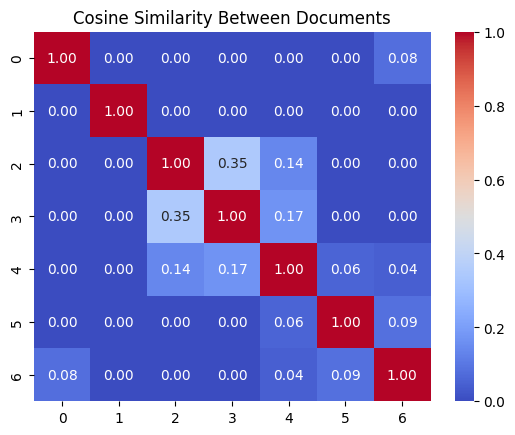

In [ ]:
# Plot the cosine similarity matrix
sns.heatmap(cosine_sim, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cosine Similarity Between Documents')
plt.show()

Inference:

We can see that tere is no significant similarity between the documents and that the documents are individually unique.